In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
import glob

In [114]:
glob.glob(r'E:\datasets\Stocks sales\individual_stocks_5yr/*csv')

['E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AAL_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AAPL_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AAP_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ABBV_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ABC_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ABT_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ACN_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADBE_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADI_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADM_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADP_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADSK_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\ADS_data.csv',
 'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AEE_data.csv',
 'E:\\datasets\\Stocks sales\\individual_sto

In [115]:
company_list = [r'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AAPL_data.csv',
               r'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AMZN_data.csv',
               r'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\GOOGL_data.csv',
               r'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\MSFT_data.csv']

In [116]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data,current_df], ignore_index = True)

In [118]:
all_data.shape

(5036, 7)

In [119]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [120]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [121]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [122]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [123]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

#### Analyzing change in stock price overtime

In [124]:
tech_list = all_data['Name'].unique()

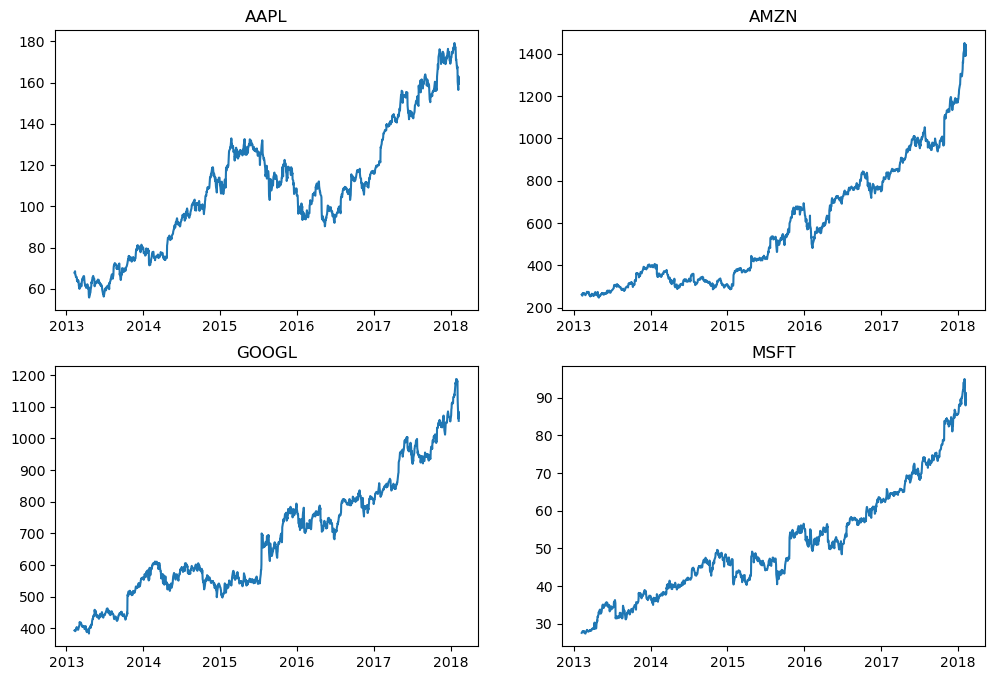

In [125]:
plt.figure(figsize = (12,8))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=  all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

#### Analyzing moving avergae of the various stock

In [126]:
all_data['close'].rolling(window = 10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [127]:
new_data = all_data.copy()

In [128]:
new_ma = [10, 20, 50]

In [129]:
for ma in new_ma:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [130]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5031,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
5032,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
5033,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
5034,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


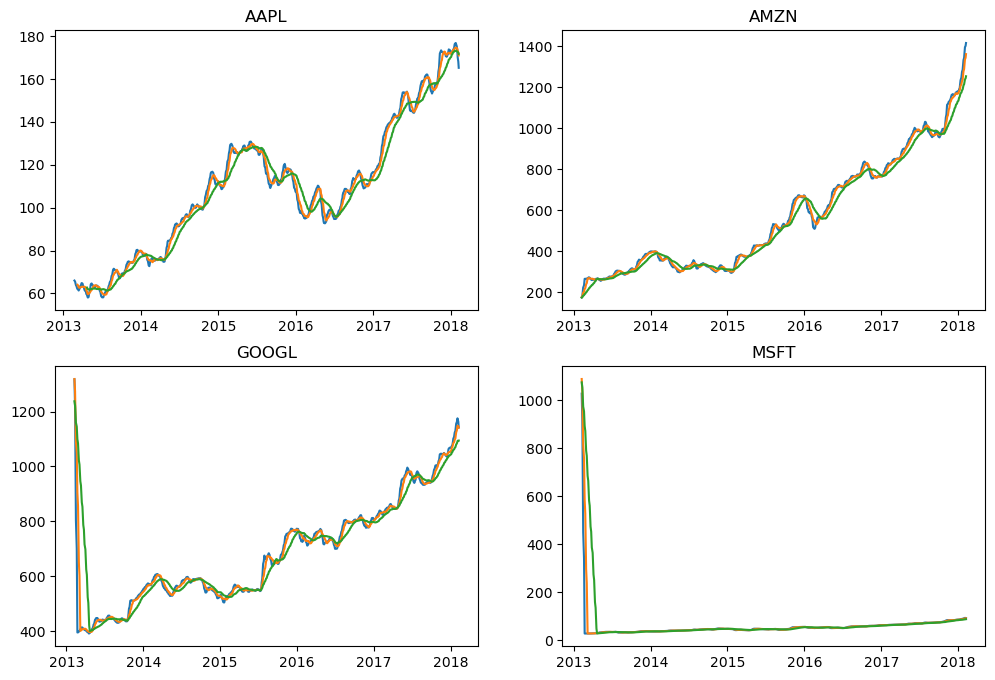

In [131]:
plt.figure(figsize = (12,8))
for index, company in enumerate(tech_list, 1):
    close_list = ['close_10', 'close_20', 'close_50']
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    for i in close_list:
        plt.plot(df['date'], df[i])
        plt.title(company)

#### Analyzing closing price change in Apple Stock

In [132]:
apple = pd.read_csv(r'E:\\datasets\\Stocks sales\\individual_stocks_5yr\\AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [133]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

In [134]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [135]:
import plotly.express as px

In [136]:
px.line(apple, x = 'date', y = 'Daily return(in %)')

#### Performing resampling analysis of closing price

In [137]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [138]:
apple['date'] = pd.to_datetime(apple['date'])

In [139]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [140]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [141]:
apple.set_index('date',inplace = True)

In [142]:
apple.head()

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [143]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

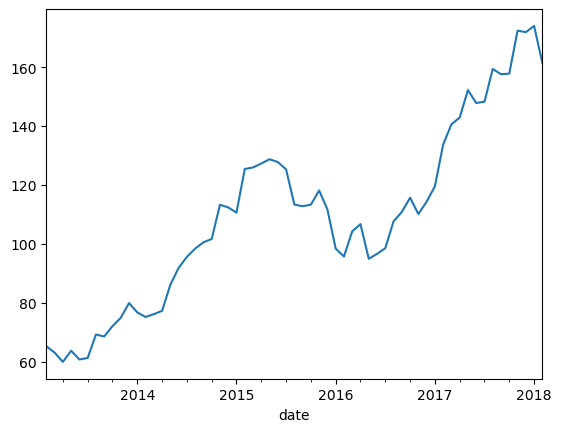

In [144]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

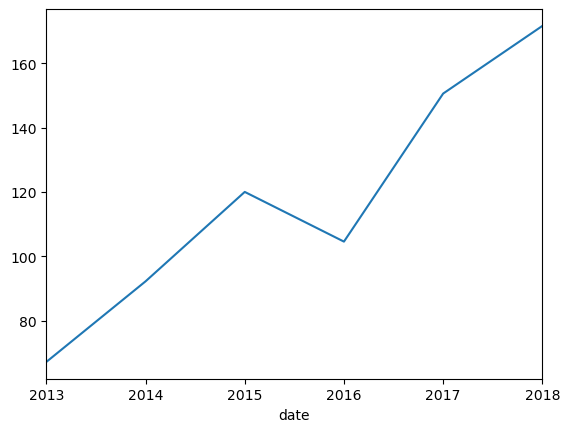

In [145]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

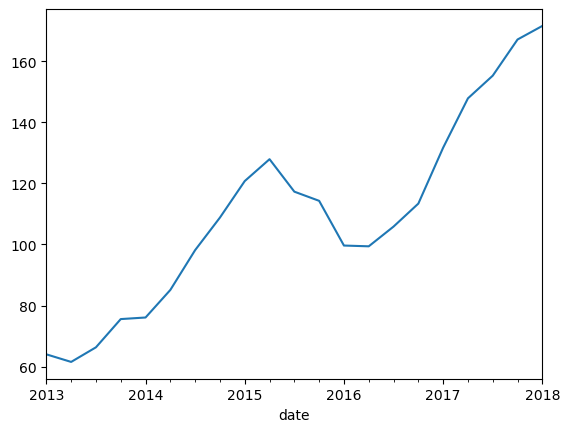

In [146]:
apple['close'].resample('Q').mean().plot()

#### Checking if the closing price of these tech companies are correlated or not?

In [147]:
company_list

['E:\\\\datasets\\\\Stocks sales\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'E:\\\\datasets\\\\Stocks sales\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'E:\\\\datasets\\\\Stocks sales\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'E:\\\\datasets\\\\Stocks sales\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [148]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [149]:
closing_price = pd.DataFrame()

In [150]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [151]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


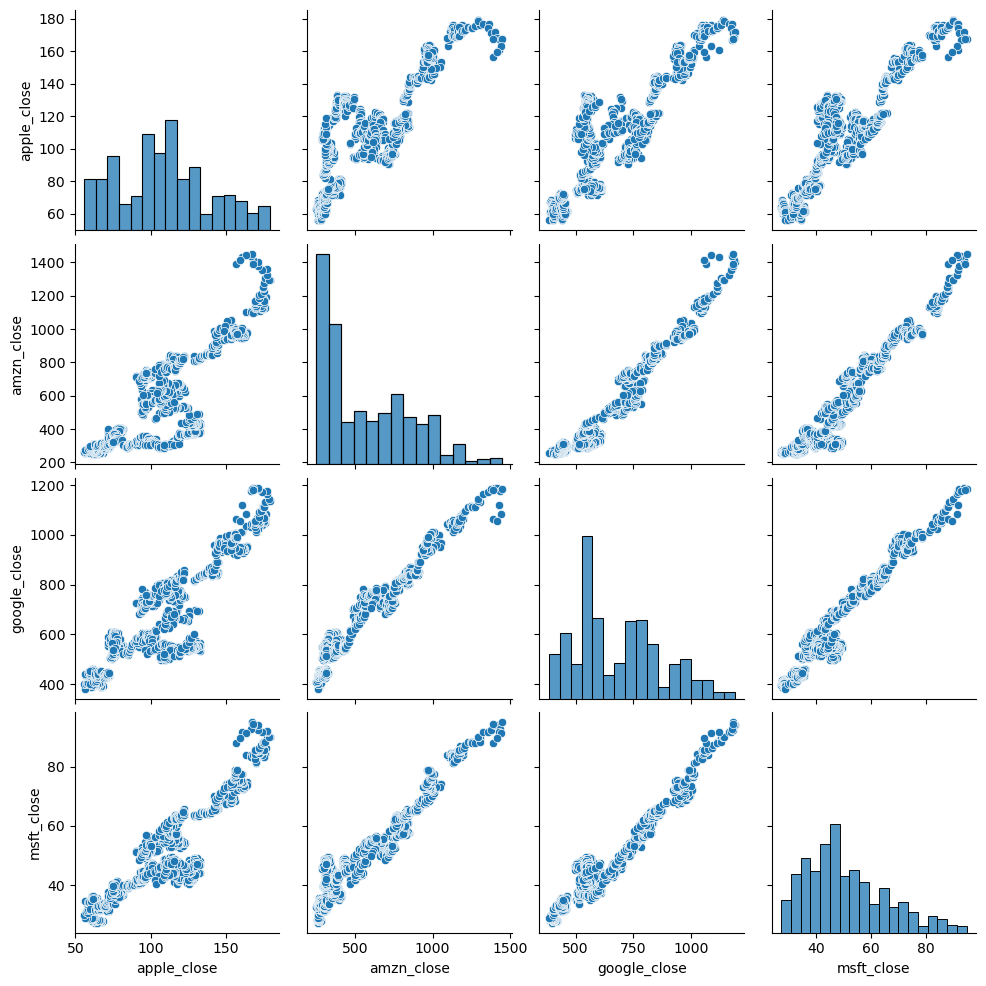

In [152]:
sns.pairplot(closing_price)

In [153]:
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.843736,0.899689
amzn_close,0.819078,1.000000,0.973988,0.955977
google_close,0.843736,0.973988,1.000000,0.970779
msft_close,0.899689,0.955977,0.970779,1.000000


<Axes: >

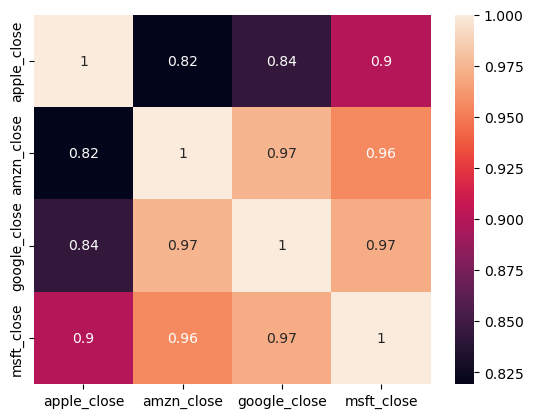

In [154]:
sns.heatmap(closing_price.corr(), annot = True)

#### To check whether daily change in closing price of stock and daily returns of stock are correlated or not?

In [155]:
closing_price['apple_close'].pct_change()

0            NaN
1       0.010422
2      -0.025067
3      -0.001903
4      -0.000899
          ...   
1254    0.002090
1255   -0.043390
1256   -0.024984
1257    0.041792
1258   -0.021407
Name: apple_close, Length: 1259, dtype: float64

In [156]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = closing_price[col].pct_change()

In [157]:
closing_price.head()

,apple_close,amzn_close,google_close,msft_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,0.010422,-0.018095,-0.003756,0.011252
2,66.8428,258.70,390.7403,27.88,-0.025067,0.005793,-0.002198,0.000718
3,66.7156,269.47,391.8214,28.03,-0.001903,0.041631,0.002767,0.005380
4,66.6556,269.24,394.3039,28.04,-0.000899,-0.000854,0.006336,0.000357


In [159]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [160]:
closing_df = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
                            'google_close_pct_change', 'msft_close_pct_change']]

In [161]:
closing_df.head()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,0.010422,-0.018095,-0.003756,0.011252
2,-0.025067,0.005793,-0.002198,0.000718
3,-0.001903,0.041631,0.002767,0.005380
4,-0.000899,-0.000854,0.006336,0.000357


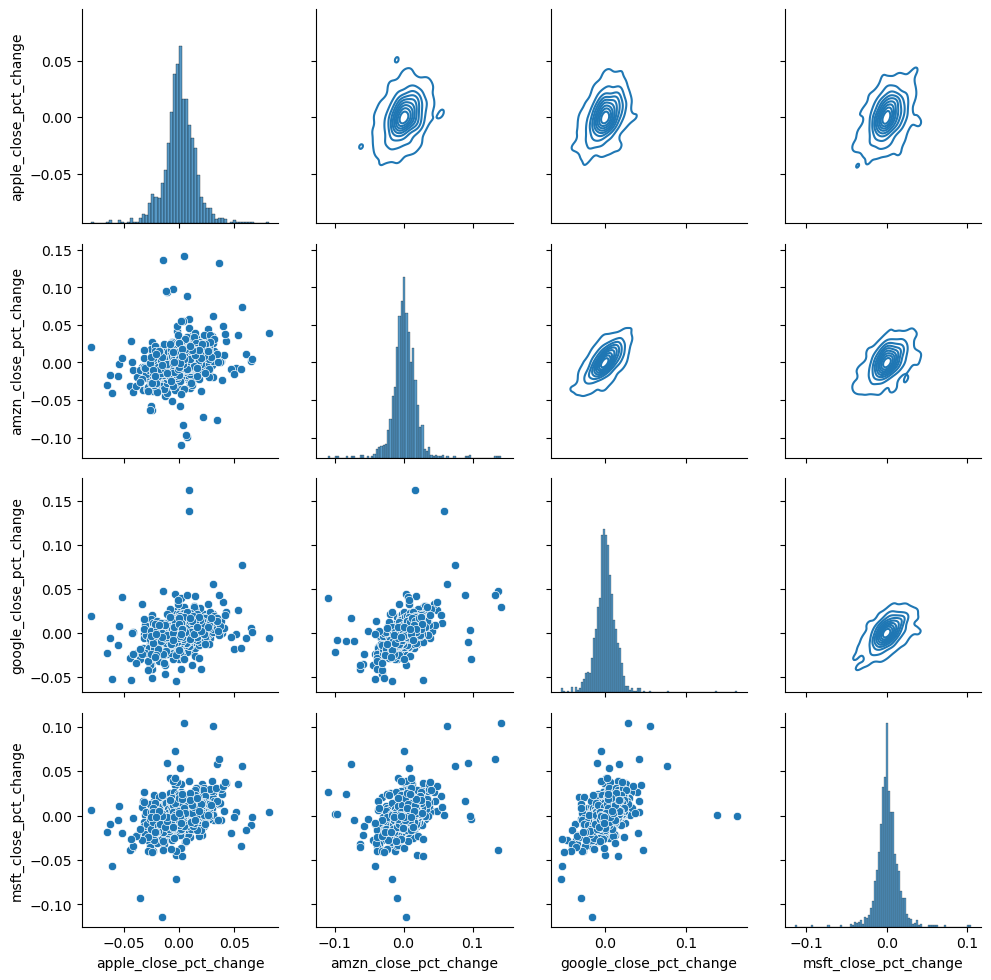

In [165]:
g = sns.PairGrid(closing_df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [166]:
closing_df.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
amzn_close_pct_change,0.287659,1.000000,0.548423,0.402678
google_close_pct_change,0.348858,0.548423,1.000000,0.488373
msft_close_pct_change,0.366598,0.402678,0.488373,1.000000


<Axes: >

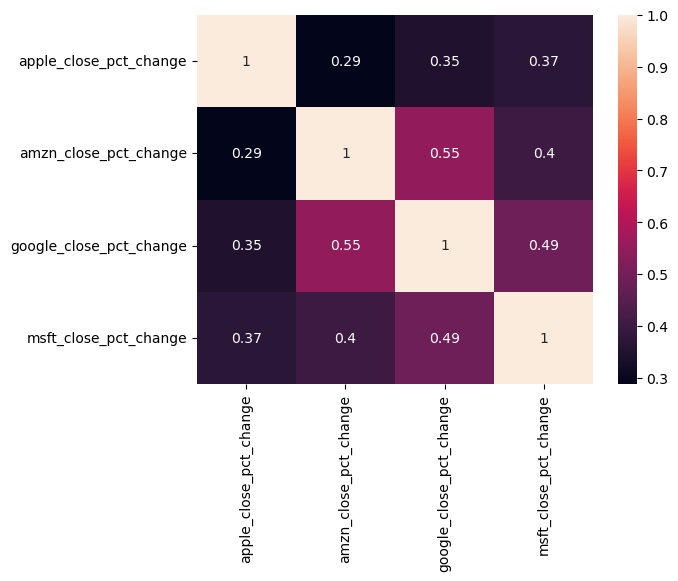

In [167]:
sns.heatmap(closing_df.corr(), annot = True)